# Comparison between "LogisticRegression" model and "RandomClassifier" model with kaggle HeartFailure dadaset

## Import librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


## Reading data

In [2]:
df = pd.read_csv('data/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Heart disease distribution

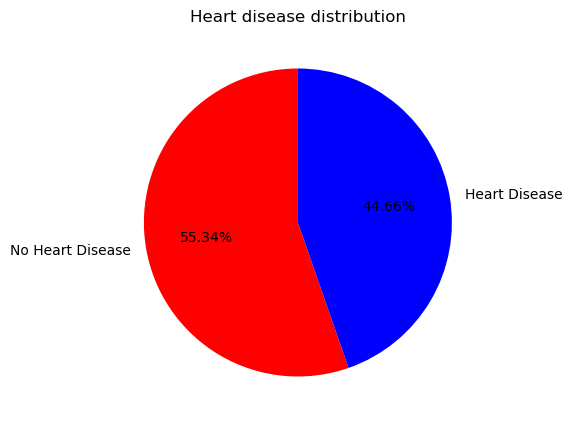

In [4]:
nb_heart_disease = df['HeartDisease'].value_counts()
plt.figure(figsize=(5, 5))
plt.title('Heart disease distribution')
plt.pie(
    nb_heart_disease, 
    labels=['No Heart Disease', 'Heart Disease'], 
    autopct='%1.2f%%', 
    colors=['red','blue'],
    startangle=90, )
plt.show()

## Encoding Categorical data

In [5]:
label = LabelEncoder()
categ_col = ['Sex', 'ChestPainType', 'RestingECG','ExerciseAngina','ST_Slope']
for col in categ_col :
    df[col] = label.fit_transform(df[col])

## Correlation Matrix

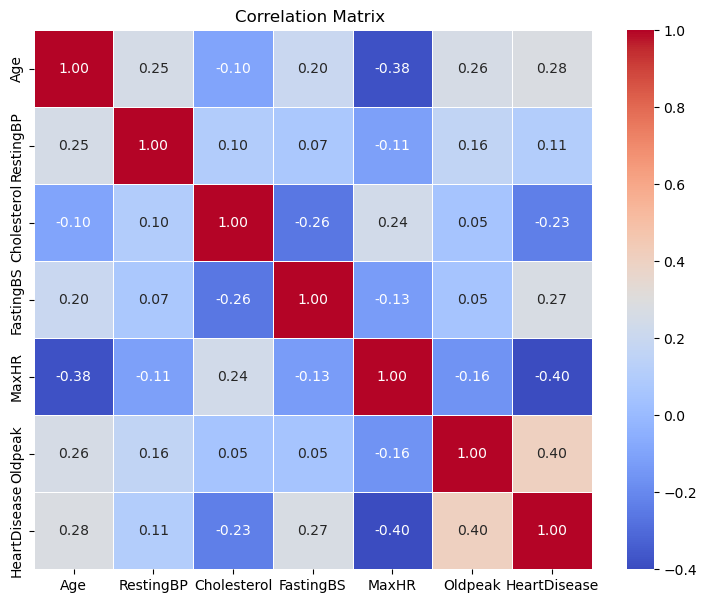

In [6]:
num_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = num_df.corr()
plt.figure(figsize=(9,7))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f', 
    linewidths=0.5,
    cbar=True,
    cmap='coolwarm')
plt.title('Correlation Matrix ')
plt.show()

In [7]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


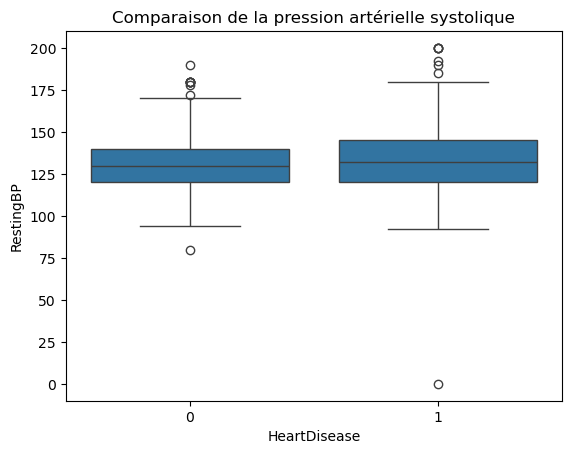

In [10]:
# Comparer la pression artérielle systolique entre les patients sains et malades
sns.boxplot(x='HeartDisease', y='RestingBP', data=df)
plt.title('Comparaison de la pression artérielle systolique')
plt.show()

## Inputs

In [11]:
X = df.drop(['HeartDisease'],axis=1)
y=df['HeartDisease']

## Results array

In [12]:
# Final result 
results = []

## Scaling data

In [13]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X = sc.fit_transform(X)

## Splitting Data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Modeling

### LogisticRegression

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

## Training

In [16]:
model.fit(X_train,y_train)

LogisticRegression()

## Testing

In [17]:
pred = model.predict(X_test)
print(f"Classiofication report: \n",classification_report(y_test,pred))

Classiofication report: 
               precision    recall  f1-score   support

           0       0.82      0.77      0.79        77
           1       0.84      0.88      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.83       184
weighted avg       0.83      0.83      0.83       184



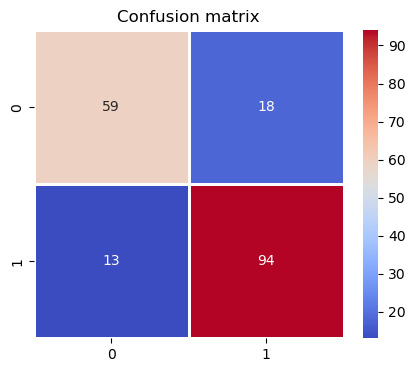

In [18]:
# Confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(
    confusion_matrix(y_test,pred),
    annot=True, 
    linewidths=1,
    cbar=True,
    cmap="coolwarm")
plt.title("Confusion matrix")
plt.show()

In [19]:
results.append(accuracy_score(y_test,pred))

## Vizualization of the prediction based on the RestingBp and Cholesterol series

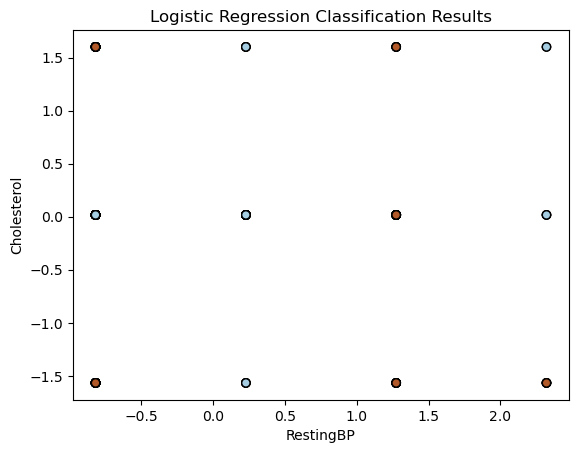

In [20]:
plt.scatter(X_test[:, 2], X_test[:, 6], c=pred, cmap=plt.cm.Paired, edgecolors='k') 


plt.title('Logistic Regression Classification Results')
plt.xlabel('RestingBP')
plt.ylabel('Cholesterol')
plt.show()

### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

## Training

In [41]:
model.fit(X_train, y_train)

RandomForestClassifier()

## Testing

Classiofication report: 
               precision    recall  f1-score   support

           0       0.82      0.78      0.80        77
           1       0.85      0.88      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184

Confusion matric :


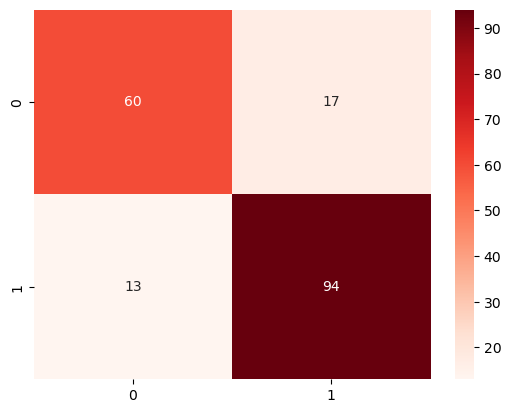

In [43]:
pred = model.predict(X_test)
print(f"Classiofication report: \n",classification_report(y_test,pred))
print("Confusion matric :")
sns.heatmap(confusion_matrix(y_test,pred), annot=True, fmt="d",cmap="Reds")
plt.show()

In [45]:
results.append(accuracy_score(y_test,pred))

## Display results

In [47]:
final=np.array(results)
result=final.reshape(2,1)
columns=['Accuracy']
index=['Logistic Regression','Random Forest']
final_res=pd.DataFrame(result,index=index,columns=columns)
final_res

,Accuracy
Logistic Regression,0.831522
Random Forest,0.836957
